# Do Countries Have "Synthetic" Traits?

Bill Alive

*Last updated: 2022 Sep 13*

## Abstract

Using personal survey data with hundreds of personality features, psychologists have discovered the “Big Five” synthetic personality traits (*conscientiousness*, *extroversion*, *agreeableness*, *neuroticism*, and *openness to experience*) that can give a useful view of a human personality in only five dimensions.

**Can worldwide data on country indicators yield an analogous set of “synthetic” country traits?**

In this project, Principal Component Analysis (PCA) was used on the World Bank World Development Indicators dataset for 2018 to extract five synthetic country traits. Each of these traits reveals an intriguing set of indicators with which it is most and least correlated. The highest and lowest scoring countries for each trait are also presented.

:::{note}
This notebook is adapted from my final project for the first course in my [MicroMasters in Data Science from UC San Diego](/certification.md).

This assignment imposed a fairly strict template, which I have (mostly) followed here.
:::

:::{admonition} Summary PDF
:class: tip

For a shorter summary of these findings, read the
{download}`original PDF version <output/22719-Do_Countries_Have_Synthetic_Traits__Bill_Alive.pdf>`. 
:::

## The Problem
### "Summary" Indicators Are Inherently Biased

As we try to make sense of the world, the data can be overwhelming. We want to know, and *quantify*, which indicators really matter, but there are so many.

:::{margin} Note
The Harvard Growth Lab literally calls one of their visualization tools ["The Atlas of Economic Complexity"](https://atlas.cid.harvard.edu/).
:::

Custom indicators, like the [Economic Freedom Ranking](https://www.fraserinstitute.org/economic-freedom/) or the [Human Development Index](https://hdr.undp.org/data-center/human-development-index), can seem like the solution. Here, at last, is a single number that can tell us something important about the differences between countries.

The problem? 

By definition, these custom indicators focus only on *some* of the data. The metric is only meaningful to the degree that you agree with the presuppositons of the researchers.

### Example: Compare These Presumptions

Consider the radically different views which underly the two indicators mentioned above.

[Economic Freedom Ranking](https://www.fraserinstitute.org/economic-freedom/economic-freedom-basics):

> ...the EFW [Economic Freedom of the World] measure is an effort to identify how closely the institutions and policies of a country correspond with a limited government ideal, where the government protects property rights and arranges for the provision of a limited set of “public goods” such as national defense and access to money of sound value, but little beyond these core functions.

[Human Development Index](https://hdr.undp.org/data-center/human-development-index#%2Findicies%2FHDI=):

> The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living.

:::{margin} Note
The HDI authors also state: "The HDI simplifies and captures only part of what human development entails." I found no similarly self-aware disclaimer from the authors of the Economic Freedom Ranking, which may perhaps be troubling.
:::

Now, if you *do* agree with the presuppositions, then such indicators can be very useful. A doctor diagnosing lung cancer will also want to make assumptions and limit the data used for their diagnosis. 

### Can We Set Presuppositions Aside?

But what if we only want to know the **most distinctive traits** that distinguish countries from each other, *whatever* they might be?

## A Possible Solution

### "Synthetic" Country Traits

In psychology, extensive analysis of personality survey data has led to the taxonomy of the "Big Five" personality traits: *openness to experience*, *conscientiousness*, *extroversion*, *agreeableness*, and *neuroticism*.

Each of these "synthetic" traits is associated with many specific factors that are highly correlated. For example, a person who scores highly on *extroversion* is more likely to show traits like *sociability*, *assertiveness*, *activity*, and *talkativeness*. 

Instead of trying to make sense of a personality in hundreds of dimensions, these traits allow us to get a highly useful, quantified view of a person's most striking tendencies using only five numbers.

Can we find similar "synthetic" traits for countries?

The [WorldBank World Development Indicators dataset](https://datatopics.worldbank.org/world-development-indicators/) offers over a thousand indicators on the countries of the world. In this project, we will perform the same Principal Component Analysis (PCA) technique on this rich dataset as the PCA  demonstrated with personality survey data in Week 9 of the [UCSD DSS220x Machine Learning Fundamentals](https://www.edx.org/course/machine-learning-fundamentals-2) course, "9.4 Case Study: Personality Assessment". 

Our goal is to extract the top principal components from this data and examine these new "synthetic" traits. Will they have the potential to be as useful and meaningful as the Big Five personality traits?

## Our Dataset

### World Bank: World Development Indicators

```{image} ../assets/world-bank-logo.png
:width: 150px
:alt: World Bank Logo
:align: right
```

The [World Development Indicators dataset](https://datatopics.worldbank.org/world-development-indicators/) is the “World Bank’s premier compilation of cross-country comparable data on development.”

The full dataset includes data from 1960 to 2021. Each row consists of a country (or country grouping, like “High income”), an indicator, and then, for each year, a separate column holding that indicator’s value for that country in that year. 

For this project, I focused on a single year of data. The most recent years do not have quite as much data, so I chose to use **2018**, for which there are:

- `171,100` non-null data points 
- Distributed across `1,286` separate indicators

## Research Questions

Can we use **Principal Component Analysis** to extract “synthetic” country traits from world indicator data? 

Will these traits correspond to recognizable “features” of countries, the way the Big Five personality traits like extroversion make intuitive sense?

If not, will they provide any other interesting or useful insights? Can they show us any surprising correlations between indicators that we might not easily see otherwise?

## Methods

I used Principal Component Analysis to extract the top five “synthetic traits” from the world indicator data. I carefully followed the same steps outlined in video 9.4 from the UC San Diego [DSE220x Machine Learning Fundamentals course](https://www.edx.org/course/machine-learning-fundamentals-2), “Case Study: Personality Assessment”. 

I also relied on the Week 9 notebook for that course, which performs PCA on the MNIST dataset of handwritten digits.

With personality survey data, PCA can yield not only the synthetic traits themselves, but also:

- the personality features most and least correlated with these traits
- each person’s individual score for each trait. 

This project shows how using PCA on world indicator data can yield similar results for countries.

## Setup

```{image} ../assets/python-logo.png
:width: 200px
:alt: Python Logo
:align: right
```

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from adjustText import adjust_text

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

from IPython.display import Markdown as md

## The charts show some warnings, so let's hide those.
import warnings
warnings.filterwarnings("ignore")

## Data Preparation and Cleaning

Before we compute the covariance matrix, we need to prepare our data.

### Summary of Steps Taken Below

- Remove the data for all years except 2018.

- Remove rows for country groups. This project focuses only on individual countries. Indicators like “Gross National Product” for groups like “High income” would have introduced (even more) extreme variance into the data.

- Scale data to a normal distribution using sklearn [StandardScaler()](https://datatopics.worldbank.org/world-development-indicators/). 

- Replace missing values with zero. This may not be the optimal solution, but zero is the mean value after scaling. In future analysis, a more nuanced approach might involve removing missing values from the calculations entirely.

:::{seealso}
For the helper functions I wrote to prepare this dataset, see my [WDI helper functions](../lib/WDI.ipynb).
:::

In [2]:
# Load helper functions for this dataset.
%run ../lib/WDI.ipynb
data = get_wdi()

### Remove Country "Groups"
One problem with this dataset is that includes "groups" of countries, like "High Income" or even "World". In this context, the variance between countries is already extreme enough; these groupings will only excacerbate this problem. Let's remove everything except actual countries.

In [3]:
data = wdi_remove_groups(data)

### Choose Which Year to Study

For this project, we will consider a "snapshot" with all the indicators available for a particular year. A more complete analysis would include data from all available years, but this is problematic for multiple reasons, not least of which is the wide variance in this dataset across years.

Let's choose as recent a year as possible, but one which has as much data as possible.

#### How Many Data Points Are Available in Each Year?

In [4]:
wdi_show_by_year(data, recent=10)

Total rows: 312914
Limiting to the most recent 10 years.
Year	 Entries
2013 	 174605
2014 	 180448
2015 	 177736
2016 	 176842
2017 	 175140
2018 	 171100
2019 	 158408
2020 	 127080
2021 	 52770


Hmm. The most recent few years seem to have much less data than the preceding years. We'll choose the most recent year that has a good amount of data points.

#### Our Choice: 2018

In [5]:
year = 2018

In [6]:
df = wdi_pivot(data, year=year,pivot_column='Indicator Code')
df

Indicator Code  AG.CON.FERT.PT.ZS  AG.CON.FERT.ZS  AG.LND.AGRI.K2  \
Country Code                                                        
ABW                      0.000000        0.000000           20.00   
AFG                    369.324810        7.650676       379190.00   
AGO                      0.000000        7.930094       569524.90   
ALB                      0.000000       66.585076        11740.81   
AND                      0.000000        0.000000          188.30   
...                           ...             ...             ...   
XKX                      0.000000        0.000000            0.00   
YEM                      0.000000        3.832632       233877.00   
ZAF                    238.147139       72.833333       963410.00   
ZMB                      0.000000       52.510934       238360.00   
ZWE                    345.495495       38.350000       162000.00   

Indicator Code  AG.LND.AGRI.ZS  AG.LND.ARBL.HA  AG.LND.ARBL.HA.PC  \
Country Code                                                        
ABW                  11.111111          2000.0           0.018895   
AFG                  58.081365       7703000.0           0.207226   
AGO                  45.682594       4900000.0           0.159040   
ALB                  42.849672        611346.0           0.213282   
AND                  40.063830           830.0           0.010778   
...                        ...             ...                ...   
XKX                   0.000000             0.0           0.000000   
YEM                  44.297403       1097700.0           0.038518   
ZAF                  79.417850      12000000.0           0.207639   
ZMB                  32.063923       3800000.0           0.218999   
ZWE                  41.876696       4000000.0           0.277031   

Indicator Code  AG.LND.ARBL.ZS  AG.LND.CREL.HA  AG.LND.CROP.ZS  \
Country Code                                                     
ABW                  11.111111               0        0.000000   
AFG                  11.798854         1912634        0.330852   
AGO                   3.930376         3245206        0.252667   
ALB                  22.311898          140110        3.089562   
AND                   1.765957               0        0.000000   
...                        ...             ...             ...   
XKX                   0.000000               0        0.000000   
YEM                   2.079095          630061        0.549274   
ZAF                   9.892094         3034761        0.340453   
ZMB                   5.111718         1208016        0.048427   
ZWE                  10.339925         1641701        0.258498   

Indicator Code  AG.LND.FRST.K2  ...  per_sa_allsa.cov_q4_tot  \
Country Code                    ...                            
ABW                        4.2  ...                 0.000000   
AFG                    12084.4  ...                 0.000000   
AGO                   677175.1  ...                17.259922   
ALB                     7889.0  ...                 0.000000   
AND                      160.0  ...                 0.000000   
...                        ...  ...                      ...   
XKX                        0.0  ...                 0.000000   
YEM                     5490.0  ...                 0.000000   
ZAF                   171228.9  ...                 0.000000   
ZMB                   451904.6  ...                 0.000000   
ZWE                   175367.2  ...                 0.000000   

Indicator Code  per_sa_allsa.cov_q5_tot  per_si_allsi.adq_pop_tot  \
Country Code                                                        
ABW                             0.00000                  0.000000   
AFG                             0.00000                  0.000000   
AGO                            14.61893                 54.712662   
ALB                             0.00000                  0.000000   
AND                             0.00000                  0.000000   
...                          

### Scale values

In a standard personality survey, each feature is rated on the same scale, e.g. from 1 to 5.

Here, the scale between features varies wildly. The Gross National Income (GNI) of a country could be in the trillions, while other features are percentages between 0 and 100.

We will use a scaler from `sklearn.preprocessing` to get all the data to the same scale.

In [7]:
## See https://datagy.io/pandas-normalize-column/

## Let's try different scaling methods.
#scaler = MaxAbsScaler()
#scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
## Replace NaN with zero.
scaled_df = scaled_df.fillna(0)
## Suppress scientific notation for this preview
scaled_df.round(3)

Indicator Code  AG.CON.FERT.PT.ZS  AG.CON.FERT.ZS  AG.LND.AGRI.K2  \
Country Code                                                        
ABW                        -0.118          -0.412          -0.363   
AFG                         0.117          -0.391           0.260   
AGO                        -0.118          -0.391           0.573   
ALB                        -0.118          -0.229          -0.344   
AND                        -0.118          -0.412          -0.363   
...                           ...             ...             ...   
XKX                        -0.118          -0.412          -0.363   
YEM                        -0.118          -0.402           0.021   
ZAF                         0.033          -0.212           1.221   
ZMB                        -0.118          -0.268           0.029   
ZWE                         0.102          -0.307          -0.097   

Indicator Code  AG.LND.AGRI.ZS  AG.LND.ARBL.HA  AG.LND.ARBL.HA.PC  \
Country Code                                                        
ABW                     -1.097          -0.322             -0.723   
AFG                      0.979           0.064              0.136   
AGO                      0.431          -0.077             -0.084   
ALB                      0.306          -0.292              0.164   
AND                      0.183          -0.322             -0.760   
...                        ...             ...                ...   
XKX                     -1.589          -0.322             -0.810   
YEM                      0.370          -0.267             -0.634   
ZAF                      1.922           0.279              0.138   
ZMB                     -0.171          -0.132              0.190   
ZWE                      0.263          -0.122              0.455   

Indicator Code  AG.LND.ARBL.ZS  AG.LND.CREL.HA  AG.LND.CROP.ZS  \
Country Code                                                     
ABW                     -0.166          -0.305          -0.551   
AFG                     -0.115          -0.131          -0.507   
AGO                     -0.700          -0.010          -0.517   
ALB                      0.666          -0.292          -0.141   
AND                     -0.861          -0.305          -0.551   
...                        ...             ...             ...   
XKX                     -0.992          -0.305          -0.551   
YEM                     -0.838          -0.248          -0.478   
ZAF                     -0.257          -0.029          -0.506   
ZMB                     -0.612          -0.195          -0.544   
ZWE                     -0.224          -0.156          -0.517   

Indicator Code  AG.LND.FRST.K2  ...  per_sa_allsa.cov_q4_tot  \
Country Code                    ...                            
ABW                     -0.252  ...                   -0.306   
AFG                     -0.236  ...                   -0.306   
AGO                      0.661  ...                    0.993   
ALB                     -0.242  ...                   -0.306   
AND                     -0.252  ...                   -0.306   
...                        ...  ...                      ...   
XKX                     -0.252  ...                   -0.306   
YEM                     -0.245  ...                   -0.306   
ZAF                     -0.021  ...                   -0.306   
ZMB                      0.357  ...                   -0.306   
ZWE                     -0.016  ...                   -0.306   

Indicator Code  per_sa_allsa.cov_q5_tot  per_si_allsi.adq_pop_tot  \
Country Code                                                        
ABW                              -0.286                    -0.316   
AFG                              -0.286                    -0.316   
AGO                               1.327                     3.334   
ALB                              -0.286                    -0.316   
AND                              -0.286                    -0.316   
...                          

#### Sanity Check: What Are Our Max and Min Values After Scaling?

Let's do a sanity check and see what our max and min values are after scaling.

How extreme are these ranges?

In [8]:
ind = max(scaled_df)
ind

max_min = []

for col in scaled_df.columns:
    max_min.append(( \
        col, \
        get_indicator_name(data, col), \
        round(max(scaled_df[col]), 3), \
        round(min(scaled_df[col]), 3), \
        round(np.mean(scaled_df[col]), 5), \
        round(np.std(scaled_df[col]),3)
    ))
    
def style_max_min(df):
    """Style max/min dataframes."""
    return df.style\
        .format(precision=1)\
        .hide(['code'], axis='columns')\
        .hide(axis='index')\
        .set_properties(**{'text-align': 'left'})\
        .set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
    
max_min_df = pd.DataFrame(max_min, columns = ['code', 'name','max','min','mean','std']).sort_values(['max'])

##### Max Values

In [9]:
style_max_min(max_min_df.sort_values('max',ascending=False).head(5)).highlight_max('max',axis='columns')

##### Min Values

In [10]:
style_max_min(max_min_df.sort_values('min').head(5)).highlight_min('min', axis='columns')

#### Are These Variances Too Extreme?

Hmm. In a standard Gaussian distribution, we wouldn't expect to see many numbers beyond positive or negative 3, i.e. more than three standard deviations from the mean. But here we see positive and negative **14**.

These highs and lows seem rather extreme. Is something going wrong with our scaling?

On the other hand, the means do appear to be zero, and the standard deviation is one.

Perhaps it makes sense that we would see extreme differences between countries. This dataset ranges from tiny island nations to massive populations like China and India.

Still, it may be naive to think that we can compare countries of such massively different scale without further adjustment. For instance, it may be that all features connected with  absolute quantities like gross income or forest acreage should be "normalized" to a number per capita. That would require a manual review of nearly 1300 features, though, and is thus outside the scope of this initial exploration. 

For now, let's proceed.

## Compute 

### Compute covariance matrices

Note: This PCA analysis follows the PCA_MNIST notebook in DSE-220x Week 9.

In [11]:
## Set df to our scaled df
df = scaled_df

## Compute covariance matrix
Sigma = np.cov(df, rowvar=0, bias=1)

## Compute eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)
# eigenvectors.shape

### Compute synthetic traits

We are now ready to compute these synthetic traits.

In [12]:
# Get the top k eigenvectors
k = 5
d = len(eigenvectors)
U = eigenvectors[:,(d-k):d]

# This matrix will perform PCA projection onto the top k eigenvectors
U.T

# Initialize a dataframe of these traits, indexed with country codes.
traits = pd.DataFrame(index = df.index, columns = range(0,k))

# For each country, project its features onto each of the top k eigenvectors,
# resulting in this country's score for this synthetic trait.

for country in df.index:
    for trait in range(0,k):
        traits.loc[country][trait] = np.dot(df.loc[country],U.T[trait])

#head_num=10
#precision=2
#traits.head(head_num).style.format(precision=precision)

### Traits by Country, Normal Scale

We have our traits! 

True, we have no idea whether they mean anything yet. But let's see they are each distributed across the 217 countries. 

Trait 0 is based on the first principal component, trait 1 on the second, etc.

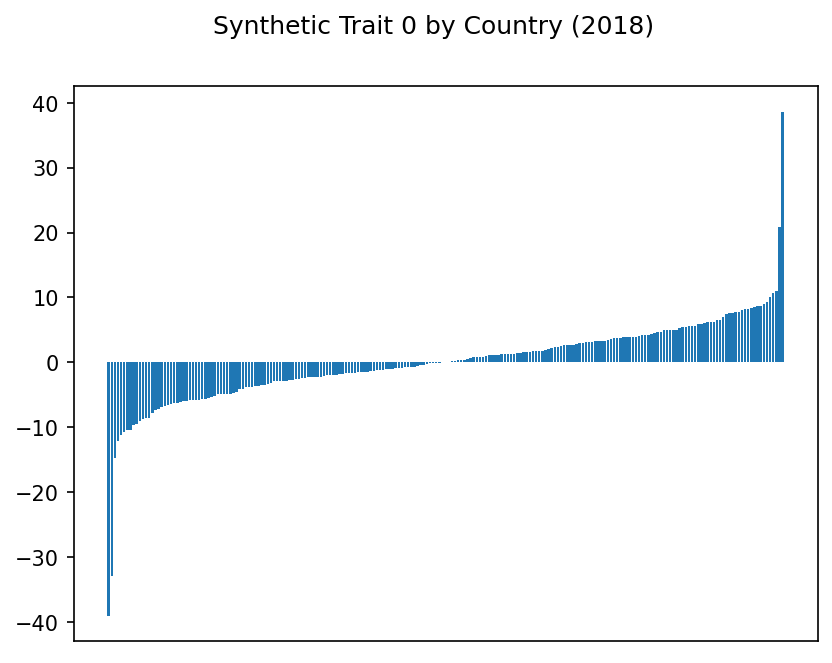

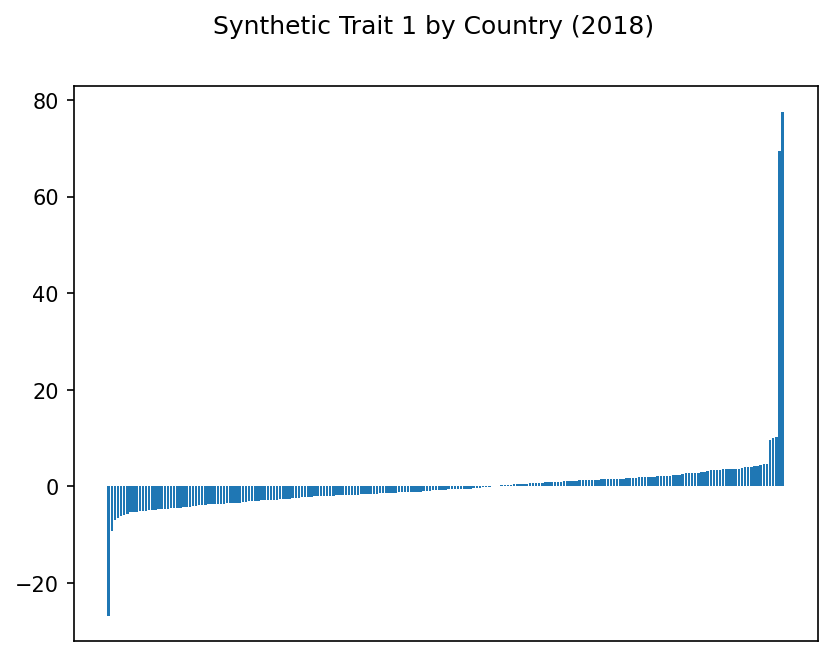

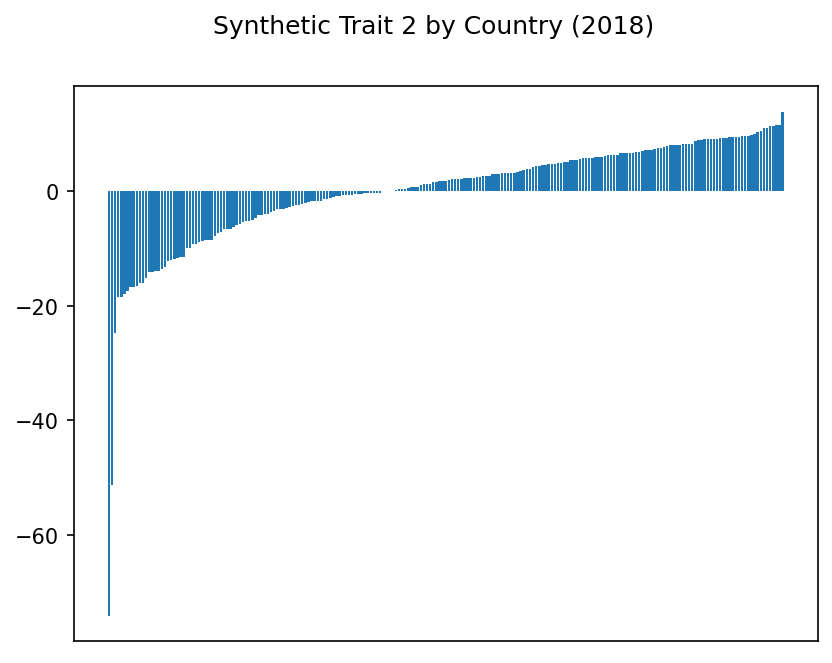

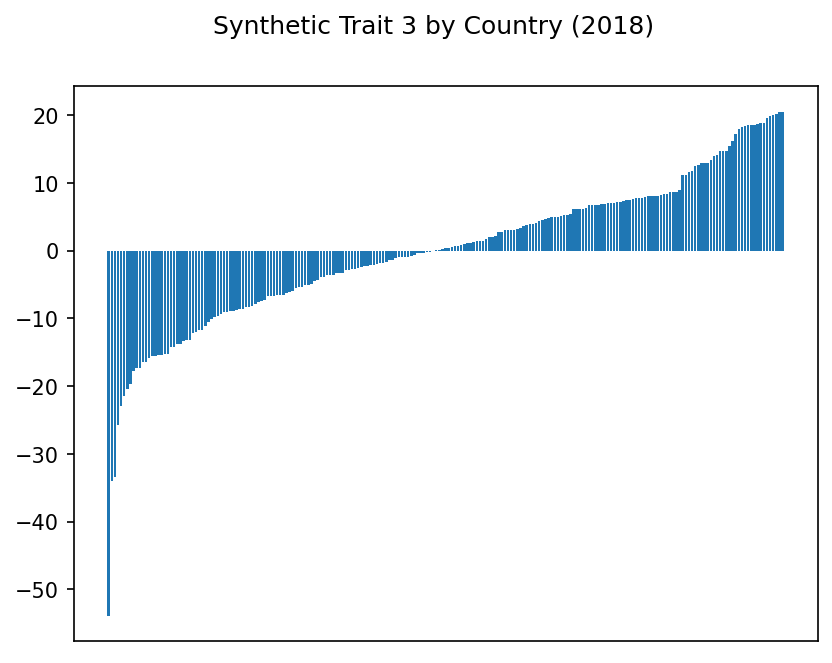

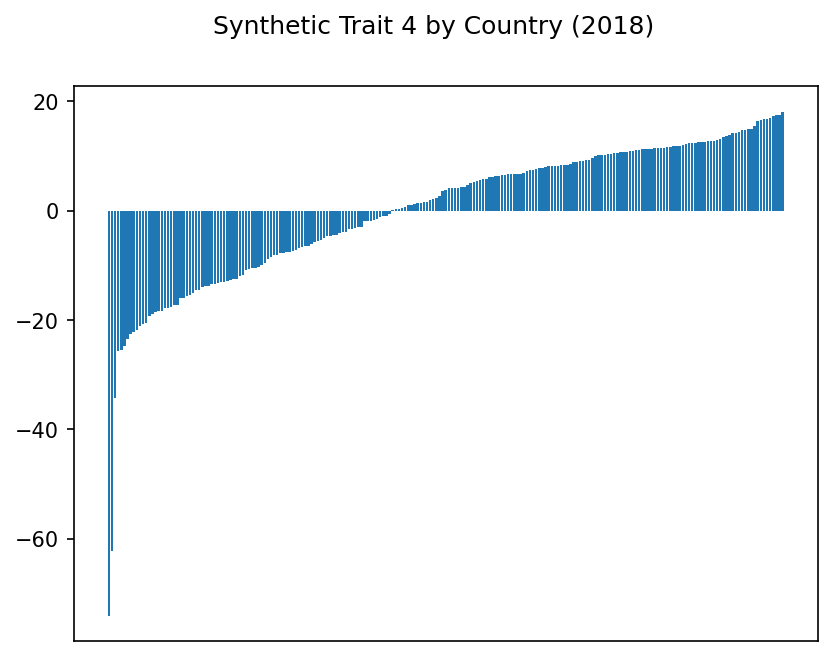

In [13]:
plt.rcParams['figure.dpi'] = 150

for trait in range(0,k):
    fig, axis = plt.subplots()
    plt.suptitle(f"Synthetic Trait {trait} by Country ({year})")
    plt.bar(traits.index, np.sort(traits[trait]))
    # Hide xticks
    plt.xticks([])

Hmm. Some of these traits show some suspiciously **extreme highs and lows**. Even with our scaling above, it may be that **outliers** are disproportionately affecting the results.

Let's try a **logarithmic** scale.

### Traits by Country, Logarithmic Scale

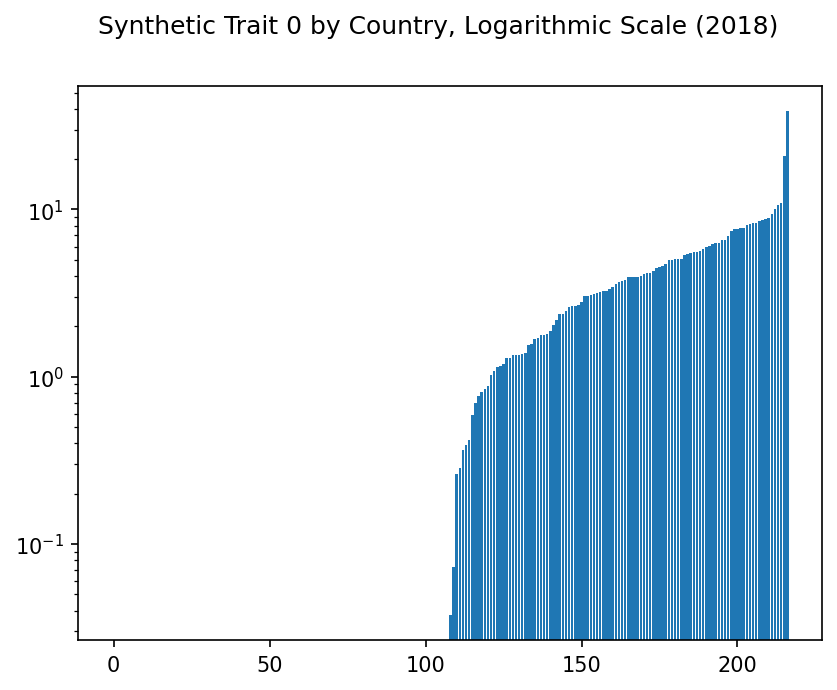

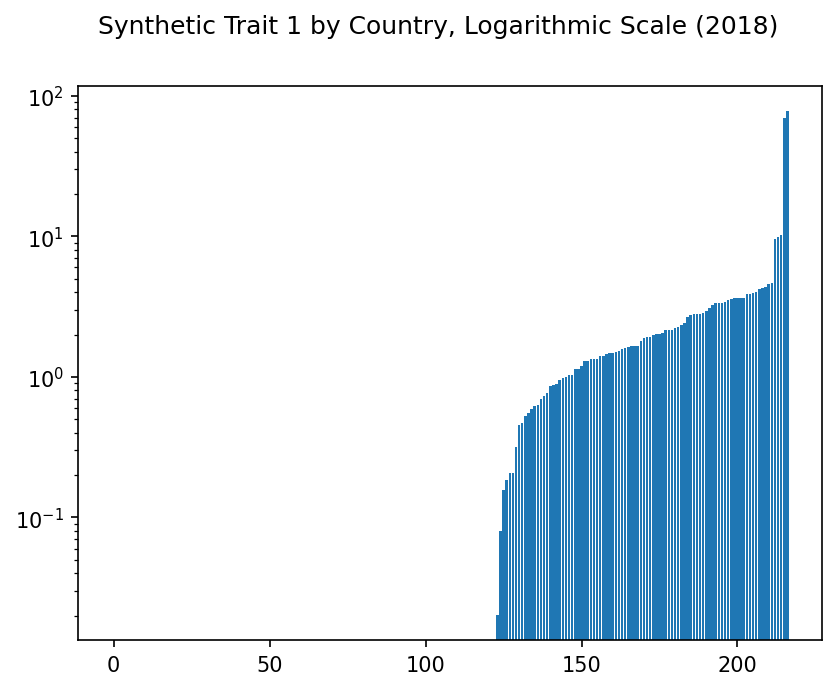

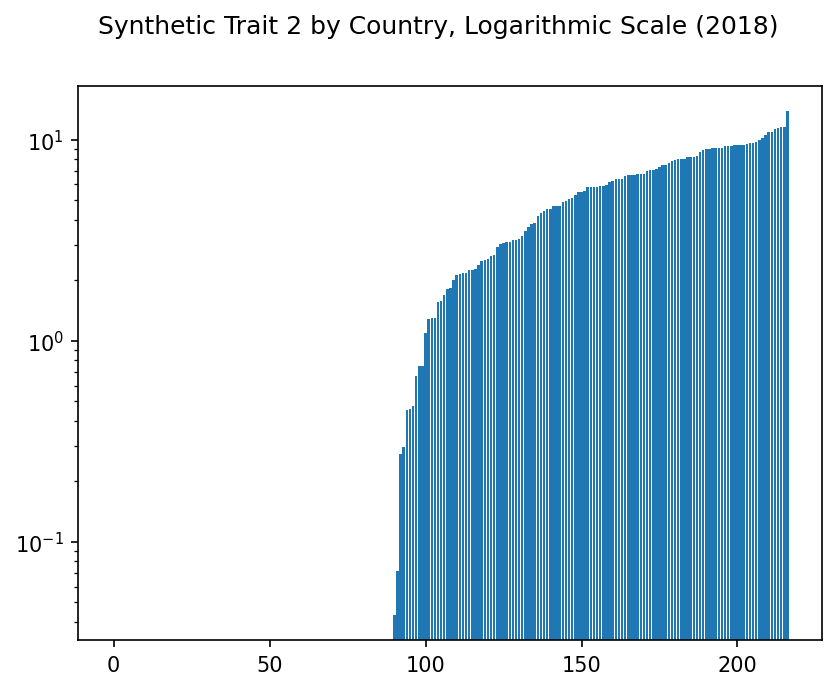

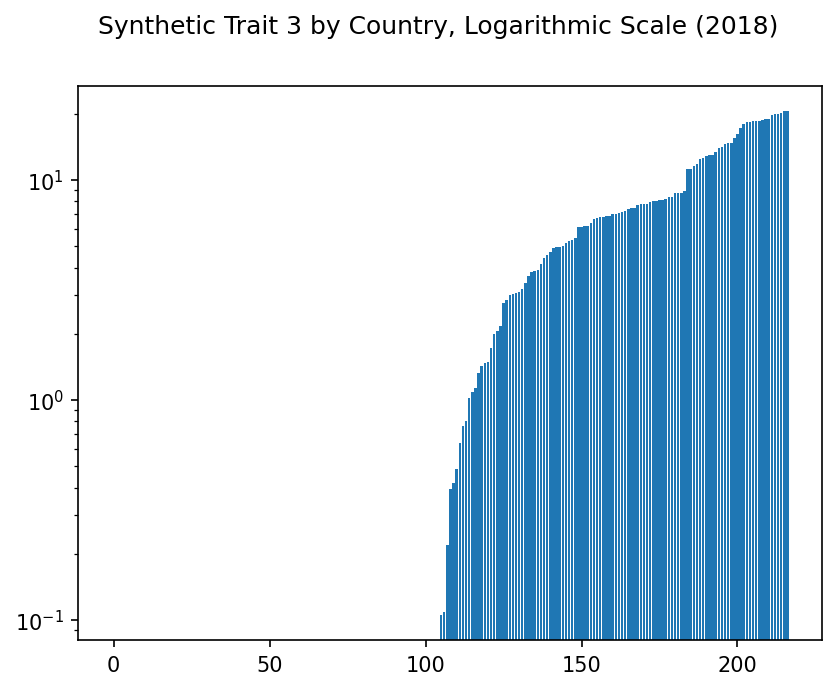

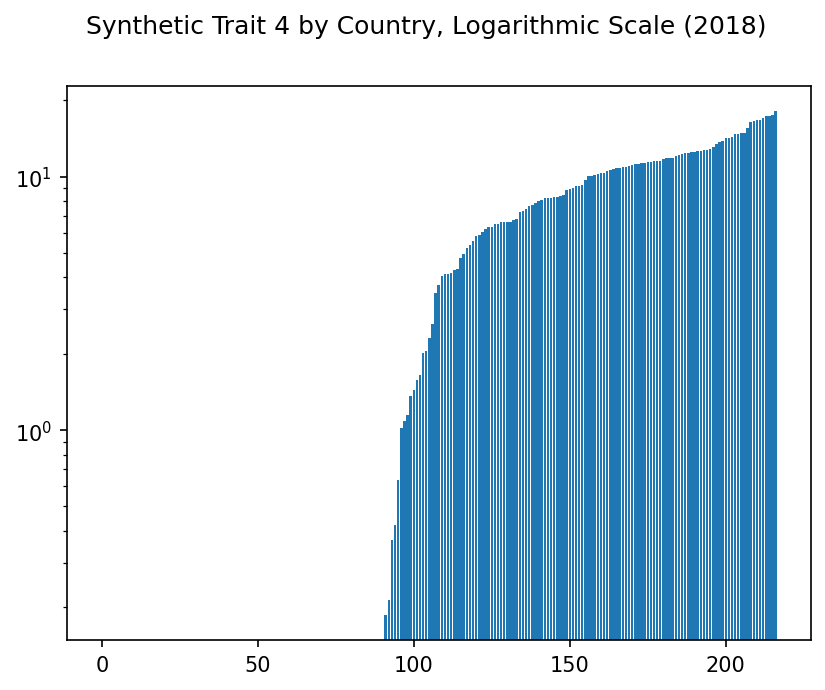

In [14]:
for trait in range(0,k):
    fig, axis = plt.subplots()
    plt.suptitle(f"Synthetic Trait {trait} by Country, Logarithmic Scale ({year})")
    plt.yscale("log")
    plt.bar(range(0, len(traits)), np.sort(traits[trait]))

Interesting. Using a logarithmic scale doesn't actually change anything, but at least  these traits now *appear* more usable.

Now for the real question. What, if anything, do these traits actually mean?

## Findings: Trait Indicators and Country Scores

What are the top and bottom indicators in each synthetic trait, and which countries show the highest and lowest scores?

For each trait, we will take its dot product with each feature. Those features with the largest dot product with this trait should show the highest correlation with it.

### Sample: Indicator and Country Scores

Here is a sample of a few **indicators** and how highly they correlate with each trait:

In [15]:
# Initialize a dataframe of these trait_indicators, indexed with indicator codes.
trait_inds = pd.DataFrame(index = df.columns, columns = range(0,k))

# For each indicator, project it onto the each our synthetic traits,
# resulting in this indicator's score for this synthetic trait.

for ind in trait_inds.index:
    for trait in range(0,k):
        trait_inds.loc[ind][trait] = np.dot(df[ind],traits[trait])

#trait_inds

ind_codes = data[['Indicator Code', 'Indicator Name']].drop_duplicates().set_index('Indicator Code')
#ind_codes

trait_inds['Indicator'] = ind_codes.loc[trait_inds.index]
col = trait_inds.pop('Indicator')
#col

head_num = 10
precision = 3

trait_inds.insert(0, col.name, col)
trait_inds.head(head_num).style.hide_index().format(precision=precision)

Also, each country has a **score** for each trait. Let's see a few of those scores.

In [16]:
country_codes = data[['Country Code', 'Country Name']].drop_duplicates().set_index('Country Code')
#country_codes

traits['Country'] = country_codes.loc[traits.index]
col = traits.pop('Country')
traits.insert(0, col.name, col)
traits.head(head_num).style.hide_index().format(precision=precision)

Now we can examine each trait in detail. For each trait, we'll show:
* The indicators most and least correlated with each trait.
* The countries with the highest and lowest scores for this trait.

Note that the scores themselves are fairly meaningless, except as *relative* numbers. I've included them only to show ranking.

:::{seealso}
For the full data, see the [Appendix](#Appendix).
:::

In [17]:
## Export the data to CSV for further analysis.
dir_output="output"
basename="traits"
file_traits_countries_year = f"{dir_output}/{basename}_countries_{year}.csv"
file_traits_indicators_year = f"{dir_output}/{basename}_indicators_{year}.csv"

traits.to_csv(file_traits_countries_year)
trait_inds.to_csv(file_traits_indicators_year)

# BUG: Jupyter Book cannot currently process markdown that is output by code.
# For now, we need to break up this for loop and do this manually.
# See https://github.com/executablebooks/MyST-NB/issues/317

def show_results(traits, trait_inds, k, ind_count=None, country_count=None):
    for t in range(0,k):
        # display(md("<hr/>"))
        display(md(f"# Synthetic Trait {t}:"))
        show = trait_inds[['Name', t]].sort_values(t, ascending=False)
        
        if ind_count is not None:
            display(md(f"## Most Correlated Indicators, Trait {t}"))
            display(show.head(ind_count))
            display(md(f"## Least Correlated Indicators, Trait {t}"))
            display(show.tail(ind_count))
        else:
            display(md(f"## Indicator Scores, Trait {t}"))
            max_rows=pd.get_option('display.max_rows')
            pd.set_option('display.max_rows', None)
            display(show)
            pd.set_option('display.max_rows', max_rows)

        if country_count is not None:
            fig, axis = plt.subplots()
            plt.suptitle(f"Highest and Lowest Scoring Countries, Trait {t} ({year})")
            scores = traits[['Name', t]].sort_values(t).head(country_count)
            display(scores)
            plt.barh(scores['Name'], scores[t], color='red')
            scores = traits[['Name', t]].sort_values(t).tail(country_count)
            display(scores)
            plt.barh(scores['Name'], scores[t], color='green')
        else:
            display(md(f"## Country Scores, Trait {t}"))
            max_rows=pd.get_option('display.max_rows')
            pd.set_option('display.max_rows', None)
            display(traits[['Name', t]].sort_values(t, ascending=False))
            pd.set_option('display.max_rows', max_rows)
    
    return

# show_results(traits,trait_inds,k,ind_count=10,country_count=5)

def show_results_trait(trait, name, traits, trait_inds, ind_count=10):
    t = trait

    show = trait_inds[[t, 'Indicator']].sort_values(t, ascending=False)
    show.rename(columns = {t:'Score'}, inplace=True)
    scores_low = get_scores_low(t, traits)
    scores_high = get_scores_high(t, traits)
    
    if name == 'most_correlated':
        display(show.head(ind_count)\
            .style.format(precision=0)\
            .set_properties(**{'text-align': 'left'})\
            .set_table_styles(
[dict(selector = 'th', props=[('text-align', 'left')])])\
            .hide(axis='index'))
    elif name == 'least_correlated':
        display(show.tail(ind_count)\
            .style.format(precision=0)\
            .set_properties(**{'text-align': 'left'})\
            .set_table_styles(
[dict(selector = 'th', props=[('text-align', 'left')])])\
            .hide(axis='index'))
    elif name == 'scoring_countries_chart':
        fig, axis = plt.subplots()
        plt.suptitle(f"Highest and Lowest Scoring Countries, Trait {t} ({year})")
        plt.barh(scores_low['Country'], scores_low[t], color='red')
        plt.barh(scores_high['Country'], scores_high[t], color='green')
    elif name == 'scoring_countries_tables':
        display(scores_high)
        display(scores_low)
        
def get_scores_low(t, traits, country_count=5):
    return traits[['Country', t]].sort_values(t).head(country_count)

def get_scores_high(t, traits, country_count=5):
    return traits[['Country', t]].sort_values(t).tail(country_count)

### Synthetic Trait 0

<style>
    #synthetic-trait-0,
    #synthetic-trait-1,
    #synthetic-trait-2,
    #synthetic-trait-3,
    #synthetic-trait-4 {
        border: 2px solid;
        padding: 0px 30px;
        margin-top: 15px;
        margin-bottom: 15px;
    }
    
    #synthetic-trait-0 { border-color: red; }
    #synthetic-trait-1 { border-color: orange; }
    #synthetic-trait-2 { border-color: green; }
    #synthetic-trait-3 { border-color: blue; }
    #synthetic-trait-4 { border-color: purple; }
    
    .plus-1 { background-color: #439d4b; }
    .plus-1 { background-color: #70c277; }
    .plus-2 { background-color: #9cd39f; }
    .plus-3 { background-color: #C7E5C9; }
    .minus-1 { background-color: #EB9C99; }
    .minus-2 { background-color: #F8DEDD; }

</style>

#### Analysis: Trait 0

:::{admonition} Striking Indicators: Trait 0

<p>⬆️<em>
<mark class="plus-1">+Debt</mark>
<mark class="plus-2">+Net Secondary Income</mark>
<mark class="plus-3">+Transport</mark>
</em><br/>⬇️<em>
<mark class="minus-1">-ODA Provided</mark>
<mark class="minus-2">-Net Primary Income</mark>
</em></p>
:::

What’s the most striking trait that sets countries apart? Apparently, it’s **debt**.

Well, not quite. The indicators most correlated with this trait are **net secondary income**. This seems to balance with two of the least correlated indicators being net primary income.

But 5 of the 10 topmost indicators here deal with debt. Plus, the countries scoring most highly on this trait are also least likely to provide [ODA](https://data.oecd.org/oda/net-oda.htm) (Official Development Assistance) elsewhere.

The high investment in **transport** is intriguing, but the low correlation with **imports of goods and services may** be misleading; other related indicators dealing with imports are more highly correlated.

#### Highest and Lowest Scoring Countries, Trait 0

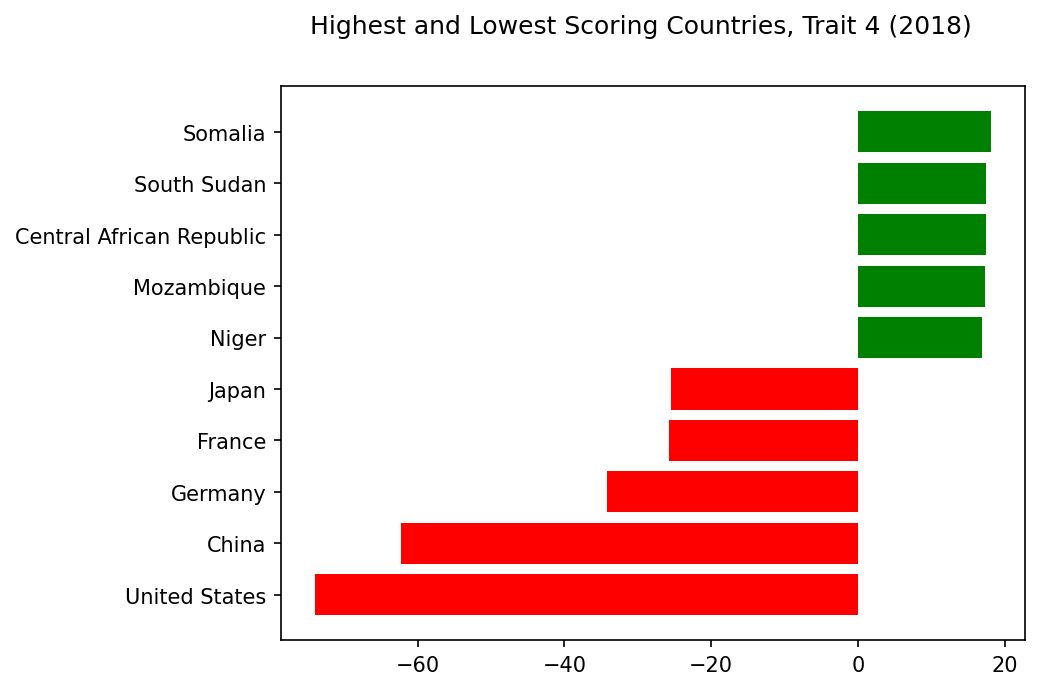

In [18]:
trait=0
show_results_trait(trait=trait,name='scoring_countries_chart',traits=traits,trait_inds=trait_inds)

#### Top 10 Indicators: Most Correlated With Trait 0

In [19]:
show_results_trait(trait=trait,name='most_correlated',traits=traits,trait_inds=trait_inds)

#### Bottom 10 Indicators: Least Correlated With Trait 0

In [20]:
show_results_trait(trait=trait,name='least_correlated',traits=traits,trait_inds=trait_inds)

### Synthetic Trait 1

#### Analysis: Trait 1

:::{admonition} Striking Indicators: Trait 1

<p>⬆️<em>
<mark class="plus-1">+GFCF</mark>
<mark class="plus-2">+Manufacturing</mark>
<mark class="plus-3">+Agriculture</mark>
</em><br/>⬇️<em>
<mark class="minus-1">-ODA Provided</mark>
<mark class="minus-2">-Net Primary Income</mark>
</em></p>
:::

For our next highest trait, the leading indicators are **gross fixed capital formation** (also called “investment”, see [here](https://data.oecd.org/gdp/investment-gfcf.htm)) as well as **manufacturing**, **industry**, and **agriculture**. 

Once again, we see **net ODA provided** and **net primary income** in the least correlated indicators.

So far, this seems to make sense. But then, what about the other leading indicators: imports, taxes, and household consumption? Should these correlate highly with manufacturing and agriculture? 

Also, why do Indonesia and Iran have such high scores? Iran had an extremely **low** score on trait 0, so there may just be a problem with this country’s data. But trait 1 may need further analysis.

#### Highest and Lowest Scoring Countries, Trait 1

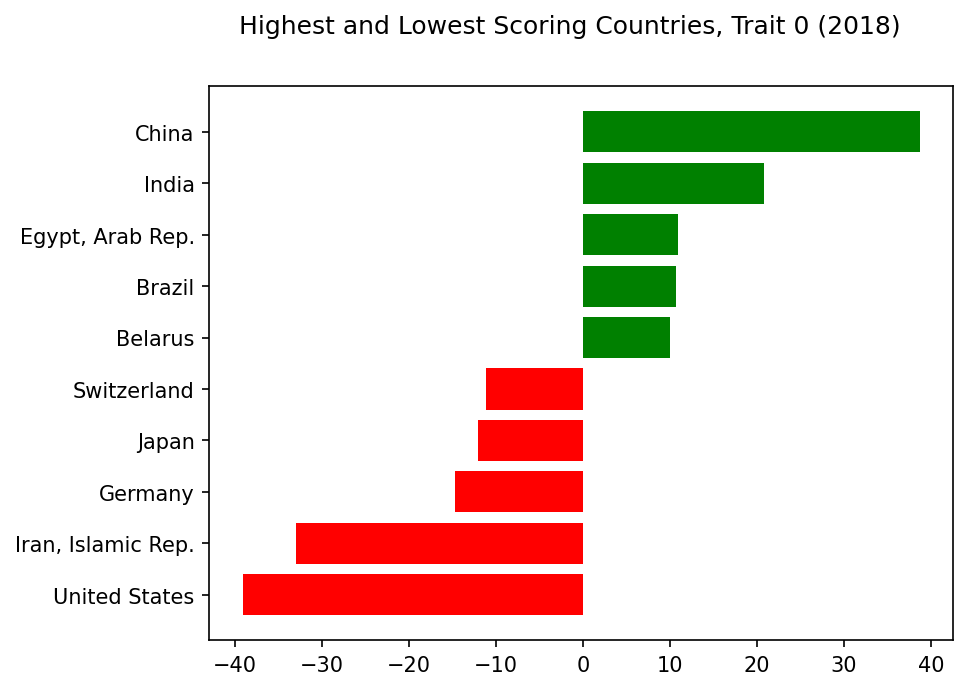

In [21]:
trait=1
show_results_trait(trait=trait,name='scoring_countries_chart',traits=traits,trait_inds=trait_inds)

#### Top 10 Indicators: Most Correlated With Trait 1

In [22]:
show_results_trait(trait=trait,name='most_correlated',traits=traits,trait_inds=trait_inds)

#### Bottom 10 Indicators: Least Correlated With Trait 1

In [23]:
show_results_trait(trait=trait,name='least_correlated',traits=traits,trait_inds=trait_inds)

### Synthetic Trait 2

#### Analysis: Trait 2

:::{admonition} Striking Indicators: Trait 2
<p>⬆️<em>
<mark class="plus-1">+SPI</mark>
<mark class="plus-2">+Older Population</mark>
<mark class="plus-3">+Labor %</mark>
</em><br/>⬇️<em>
<mark class="minus-1">-Emissions</mark>
<mark class="minus-2">-Capital Formation</mark>
</em></p>
:::

For Trait 2, the strongest indicators are, perhaps ironically, **synthetic performance indicators** [created](https://datacatalog.worldbank.org/search/dataset/0037996) by the World Bank. But we also see intriguing correlations with **adult** and **female population percentages** and **labor force participation** rates.

Meanwhile, **emissions** dominate the least correlated indicators, along with **gross capital formation** (the opposite of trait 1). 

Given the emissions issue, it’s no surprise to see the US and China with the lowest scores on this trait… but why are the Isle of Man and the Northern Mariana Islands down here as well? Missing data, perhaps? And do China and India also have low correlations with gross domestic **savings**… and **industry**? This trait requires further investigation.

#### Highest and Lowest Scoring Countries, Trait 2

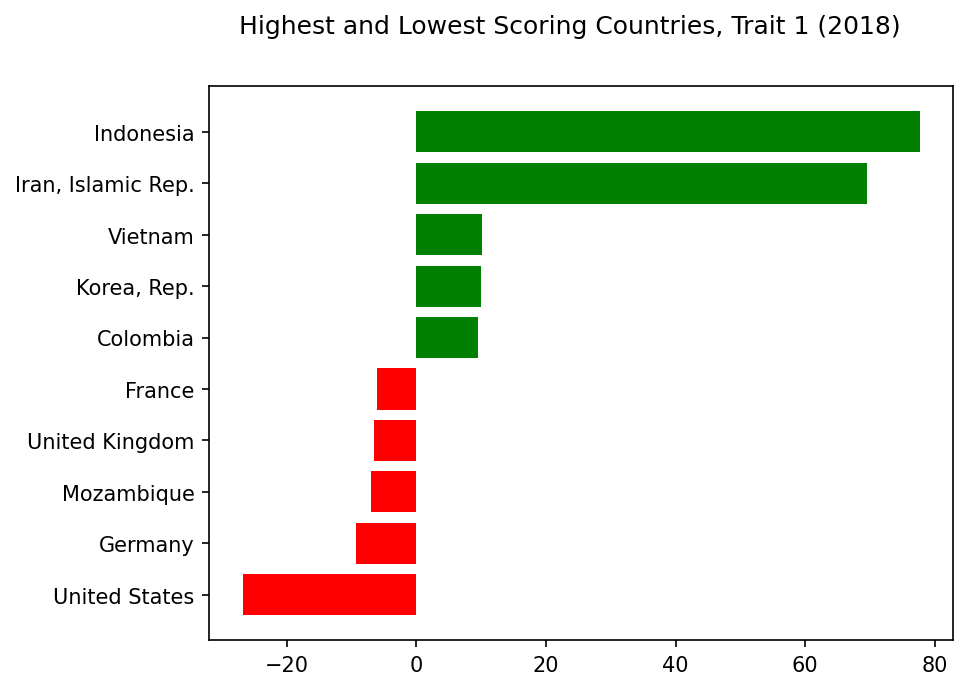

In [24]:
trait=2
show_results_trait(trait=trait,name='scoring_countries_chart',traits=traits,trait_inds=trait_inds)

#### Top 10 Indicators: Most Correlated With Trait 2

In [25]:
show_results_trait(trait=trait,name='most_correlated',traits=traits,trait_inds=trait_inds)

#### Bottom 10 Indicators: Least Correlated With Trait 2

In [26]:
show_results_trait(trait=trait,name='least_correlated',traits=traits,trait_inds=trait_inds)

### Synthetic Trait 3

#### Analysis: Trait 3

:::{admonition} Striking Indicators: Trait 3

<p>⬆️<em>
<mark class="plus-1">+GDP</mark>
<mark class="plus-2">+Electricity/Comms/Water</mark>
<mark class="plus-3">+Urban</mark>
</em><br/>⬇️<em>
<mark class="minus-1">-Children</mark>
<mark class="minus-2">-Vulnerable/Self-Employed</mark>
</em></p>
:::

At first, Trait 3 seems straightforward: **wealth**. The highest correlating indicator couldn’t be simpler: **GDP per capita**. Correlated with wealth, we see access to **electricity**, subscriptions to **broadband** and **telephone**, even **safely managed drinking water**, plus a higher percentage **urban population**. 

Meanwhile, these rich countries have a lower **percentage of children** and lower rates of **self-employment**. All very neat… until you check the country scores. 

They don’t seem to correlate with [GDP per capita](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2018&most_recent_value_desc=true&start=2018). Yes, Monaco and Isle of Man are both wealthy, and they score highly on this trait. But how can the United States possibly have one of the **lowest** scores, with a 2018 GDP per capita of [$62,805](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2018&locations=US&start=2018)? And Gibraltar, St. Martin, and the Northern Mariana Islands, it turns out, are **missing** GDP per capita data for 2018. 

So while this trait is promising, something is amiss. Filling missing values with 0’s may have skewed these scores.

#### Highest and Lowest Scoring Countries, Trait 3

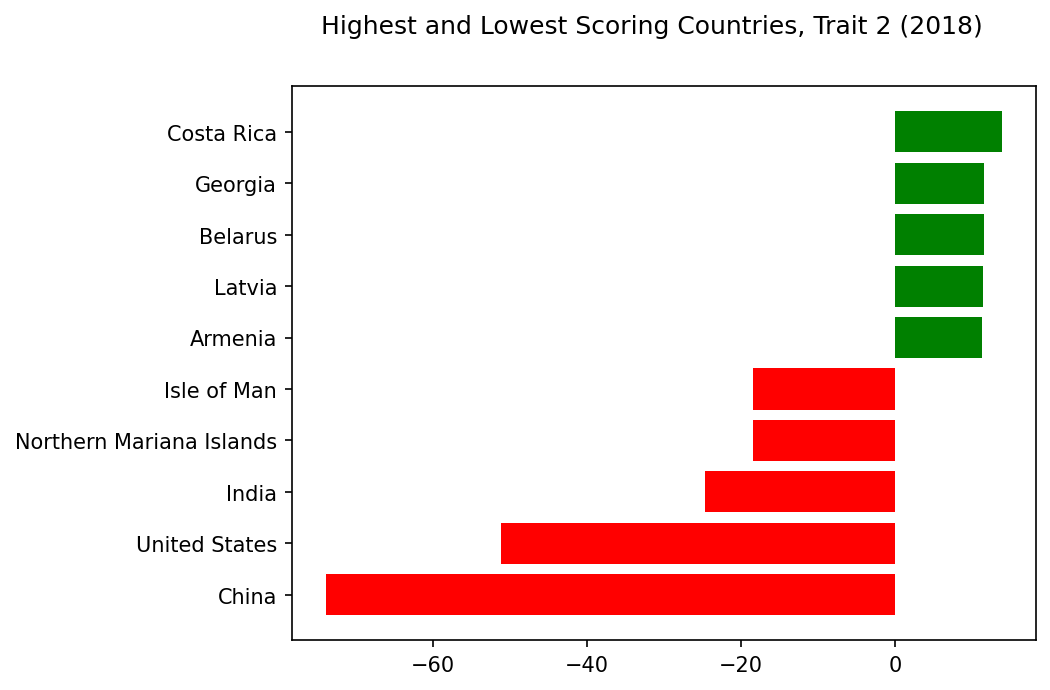

In [27]:
trait=3
show_results_trait(trait=trait,name='scoring_countries_chart',traits=traits,trait_inds=trait_inds)

#### Top 10 Indicators: Most Correlated With Trait 3

In [28]:
show_results_trait(trait=trait,name='most_correlated',traits=traits,trait_inds=trait_inds)

#### Bottom 10 Indicators: Least Correlated With Trait 3

In [29]:
show_results_trait(trait=trait,name='least_correlated',traits=traits,trait_inds=trait_inds)

### Synthetic Trait 4

#### Analysis: Trait 4

:::{admonition} Striking Indicators: Trait 4

<p>⬆️<em>
<mark class="plus-1">+Child Mortality</mark>
<mark class="plus-2">+CPIA Ratings</mark>
</em><br/>⬇️<em>
<mark class="minus-1">-Imports/Exports</mark>
<mark class="minus-2">-Health Expenditure</mark>
</em></p>
:::

Trait 4 is heartbreaking. I never expected **infant and child mortality** to dominate one of these synthetic traits.

On the flip side, we see low correlations with **health expenditure**, as well as both **imports** and **exports**. This trait seems grim; you do not want a high score.

And yet, why does it also correlate with high scores on [**CPIA ratings**](https://databank.worldbank.org/reports.aspx?source=country-policy-and-institutional-assessment)? The World Bank states that its “Country Policy and Institutional Assessment is done annually for all its borrowing countries.” Presumably, high scores are desirable, so why would they correlate with high child mortality? Non-borrowing countries do not receive **any** CPIA ratings, so perhaps that explains the correlation, but it bears further study.

#### Highest and Lowest Scoring Countries, Trait 4

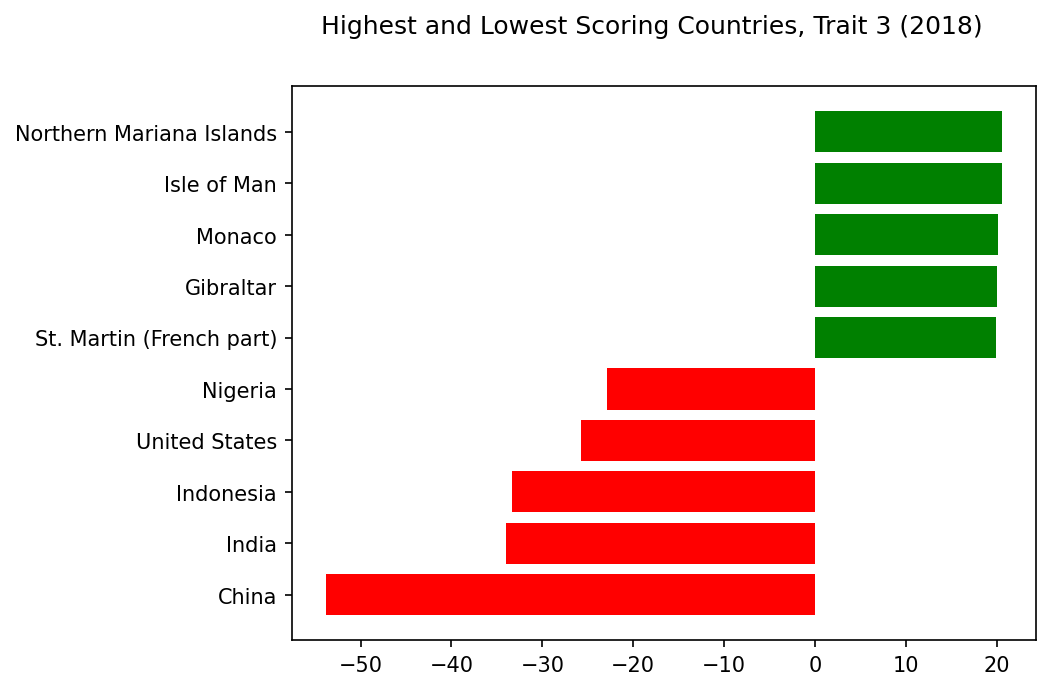

In [30]:
trait=4
show_results_trait(trait=trait,name='scoring_countries_chart',traits=traits,trait_inds=trait_inds)

#### Top 10 Indicators: Most Correlated With Trait 4

In [31]:
show_results_trait(trait=trait,name='most_correlated',traits=traits,trait_inds=trait_inds)

#### Bottom 10 Indicators: Least Correlated With Trait 4

In [32]:
show_results_trait(trait=trait,name='least_correlated',traits=traits,trait_inds=trait_inds)

## Analysis: Are These Synthetic Indicators Meaningful?

At first glance, these synthetic indicators seem disappointingly obvious. 

A high or low score on a trait often seems heavily correlated, if not determined, by a country's **wealth** level.

Is this a useful insight? Or would measures of wealth be less prominent if they were all normalized to a per capita share? An interesting question for further research.

Even so, there are some surprises. I'm intrigued by which indicators show up alongside economic indicators like income and debt. And I am startled and saddened to see how trait 4 confronts us with child mortality.

Meanwhile, while the high or low scores for some countries make intuitive sense, others seem confusing, if not downright incorrect.

In particular, the **United States** is one of the **lowest** scoring countries for **every trait**. Can this really be correct? Or does it indicate a problem with the method, especially the decision to fill missing values with zeroes? 

## Limitations

This project was inspired by PCA performed on personality surveys that offered simple, consistent data. By contrast, the features in this data vary wildly by many orders of magnitude, from gross national income to percentages to CPIA ratings from 1 to 6. Despite a simple attempt to scale the data to a normal distribution, it may well be that far more nuanced work is required to make this data usable for PCA. 

Similarly, the simple expedient of replacing missing values with zeroes may have been naive. Not only are different countries missing *different* values, but some countries are simply far more represented in the data. This higher rate of data collection may in itself be an indicator of wealth and infrastructure, which could mean that assigning zeros to countries without this benefit, when zero suggests a “mean” for a given indicator, is highly misleading. 

In trait 4, for instance, having any value for the CPIA ratings, which apply only to borrower countries, seems to be more significant than the rating itself.

Also, even this vast dataset is inherently limited. Ideally, it should be easy to scale and add new indicators from other datasets in the future, refining these synthetic traits in interesting ways.

Finally, unlike most human personalities, country indicators can change significantly over time. To be truly valuable, these synthetic traits need to be easy to understand and view over time.

## Conclusions

This project used Principal Component Analysis to propose five "synthetic" country traits based on data from the World Bank dataset of World Development Indicators.

### Answers to Research Questions

#### Can we use Principal Component Analysis to extract “synthetic” country traits from world indicator data? 

**Yes.** Despite all the limitations of this project, the traits we extracted do seem to signal some kind of meaning; they do not appear totally random.

#### Will these traits correspond to recognizable “features” of countries, the way the Big Five personality traits like extraversion make intuitive sense? 

**Uncertain.** Though some traits seem straightforward, this is sometimes belied by country scores that don’t seem right, as if the first PCA personality study had rated Richard Nixon as low on “neuroticism”. Other traits, while suggestive, do not at first glance seem to have a main “idea”, although a fuller examination of the correlating indicators might lead to one.

#### If not, will these traits provide any other interesting or useful insights? Can they show us any surprising correlations between indicators that we might not easily see otherwise? 

**Yes.** Although no obvious new “features” present themselves, these traits suggest avenues for further research.

### Avenues for Further Research

Further analysis might include:

* Including **other indicators** from other datasets
* **Scaling** absolute features like Gross National Product to be per capita, or else omitting such features where a per capita feature already exists.
* **Pruning** features which are essentially derivatives of or extremely highly correlated to more "basic" features.
* More nuance in dealing with **missing values**. I replaced them with zeroes, but is this always appropriate? Should the analysis focus only on those indicators and/or countries for which there is a minimum amount of available data?
* A careful evaluation of whether the **country scoring** is really working. Again, it's troubling to see the United States getting consistently low scores even when they don't seem to make sense. Conversely, countries which are missing data for this year, such as Gibraltar, can wind up with scores that seem inappropriately high.
* If we plot these traits changing for countries **over time**, will we see new insights?
* Finally, testing the **predictive** value of these traits. If these traits truly reveal surprising correlations, how can they lead to actionable insights? Could we discover that a particular intervention, or set of interventions, correlates more highly with desired outcomes than we had previously thought? 

Initially, I had hoped to name these traits. With the "Big Five" personality traits, it seems relatively easy to put a name on each synthetic trait: extroversion, neuroticism, etc. (Of course, this ease may be an illusion after the fact.)

With these synthetic country traits, no obvious names present themselves. But on reflection, that only makes them more enticing.

These synthetic traits with their strange correlations seem like **paths to explore:** high ridges among the mountains of data that may yield valuable, unexpected new vistas for possible positive change.

## Acknowledgements

This data was [sourced from the World Bank](https://datatopics.worldbank.org/world-development-indicators/), and as stated above, this PCA approach was based entirely on the discussion and notebook in Week 9 of the [Machine Learning Fundamentals Course, DSE220x](https://www.edx.org/course/machine-learning-fundamentals-2). 

The idea to apply this analysis to world indicators was my own, as was the preliminary analysis of these synthetic traits that is presented here.

## References

Again, the work presented here is my own. But these sources were helpful as I prepared this project:

* [UCSD DSE220x Machine Learning Fundamentals](https://www.edx.org/course/machine-learning-fundamentals-2), 9.4 "Case Study: Personality Assessment"
* Rothmann, S., & Coetzer, E. (2003). [The big five personality dimensions and job performance. SA Journal of Industrial Psychology, 29(1)](https://doi.org/10.4102/sajip.v29i1.88). 
* Wikipedia, [Big Five Personality Traits](https://en.wikipedia.org/wiki/Big_Five_personality_traits)
* Harvard Growth Lab, ["The Atlas of Economic Complexity"](https://atlas.cid.harvard.edu/).
* Fraser Institute, ["Economic Freedom Basics"](https://www.fraserinstitute.org/economic-freedom/economic-freedom-basics). 
* United Nations Development Programme, ["Human Development Index"](https://hdr.undp.org/data-center/human-development-index).
* Organisation for Economic Co-operation and Development, [Official development assistance (ODA)](https://data.oecd.org/oda/net-oda.htm).
* Organisation for Economic Co-operation and Development, [Investment (GFCF)](https://data.oecd.org/gdp/investment-gfcf.htm). 
* World Bank, [Statistical Performance Indicators (SPI)](https://datacatalog.worldbank.org/search/dataset/0037996)
* World Bank, [Country Policy and Institutional Assessment (CPIA)](https://databank.worldbank.org/reports.aspx?source=country-policy-and-institutional-assessment)

## Appendix

:::{admonition} Download
:class: tip

Here are the full tables of data on these synthetic traits. 

- {download}`Traits by Country, 2018 (CSV) <output/traits_countries_2018.csv>`
- {download}`Traits by Indicators, 2018 (CSV) <output/traits_indicators_2018.csv>`

For a shorter summary of these findings, see the
{download}`original PDF version <output/22719-Do_Countries_Have_Synthetic_Traits__Bill_Alive.pdf>`. 
:::